# Loading Dataset from Vehicle.csv

In [1]:
#importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import classification_report
from sklearn import metrics
warnings.filterwarnings("ignore")

In [2]:
#importing custom python modules
import modules as Mvehicle
import ModelEvaluation as model
import VisualizationForMisclassification as visualize

In [3]:
vehicle = pd.read_csv('../../datasets/vehicles.csv')

# Exploratory Data Analysis

In [4]:
vehicle.head(5)

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [5]:
Mvehicle.dataset_statistics(vehicle)

Shape of the dataset:  (846, 19)

Features of the dataset are: 
 ['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO', 'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO', 'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY', 'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR', 'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR', 'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR', 'HOLLOWS_RATIO', 'Class']

Target Labels of dataset are: 
 ['van' 'saab' 'bus' 'opel']


In [6]:
#Dataset Label value Count
vehicle['Class'].value_counts()

bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64

## DataSet Statistics 

By comapring standard deviation and mean your data points, it is observed that our data points are 
almost tend to be close to the means we have few outliers present in the dataset.

In [7]:
#to check if outliers are present in the data
vehicle.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


#  Data Visualization  

## Histogram


Histogram for analyzing the frequency of labled class.



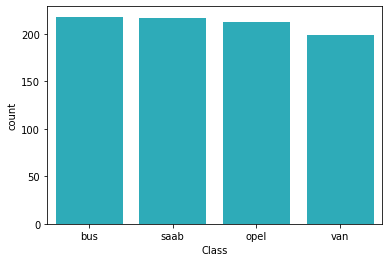

In [8]:
Mvehicle.histogram(vehicle)

## Correlation Matrix

Correlation helps you to find out the relationship between variables. According to Correlation graph,

-  it can be observed that KURTOSIS_ABOUT_MAJOR AND KUROSIS_ABOUT_MINOR has a little impact on overall data. For the reason these features can be eliminated from the dataset. On the Contraty, SCALED_VARIANCE_MINOR is perfect highly correlated to SCATTER_RATIO, means we can also eliminate one of these two variables.

Correlation Analysis



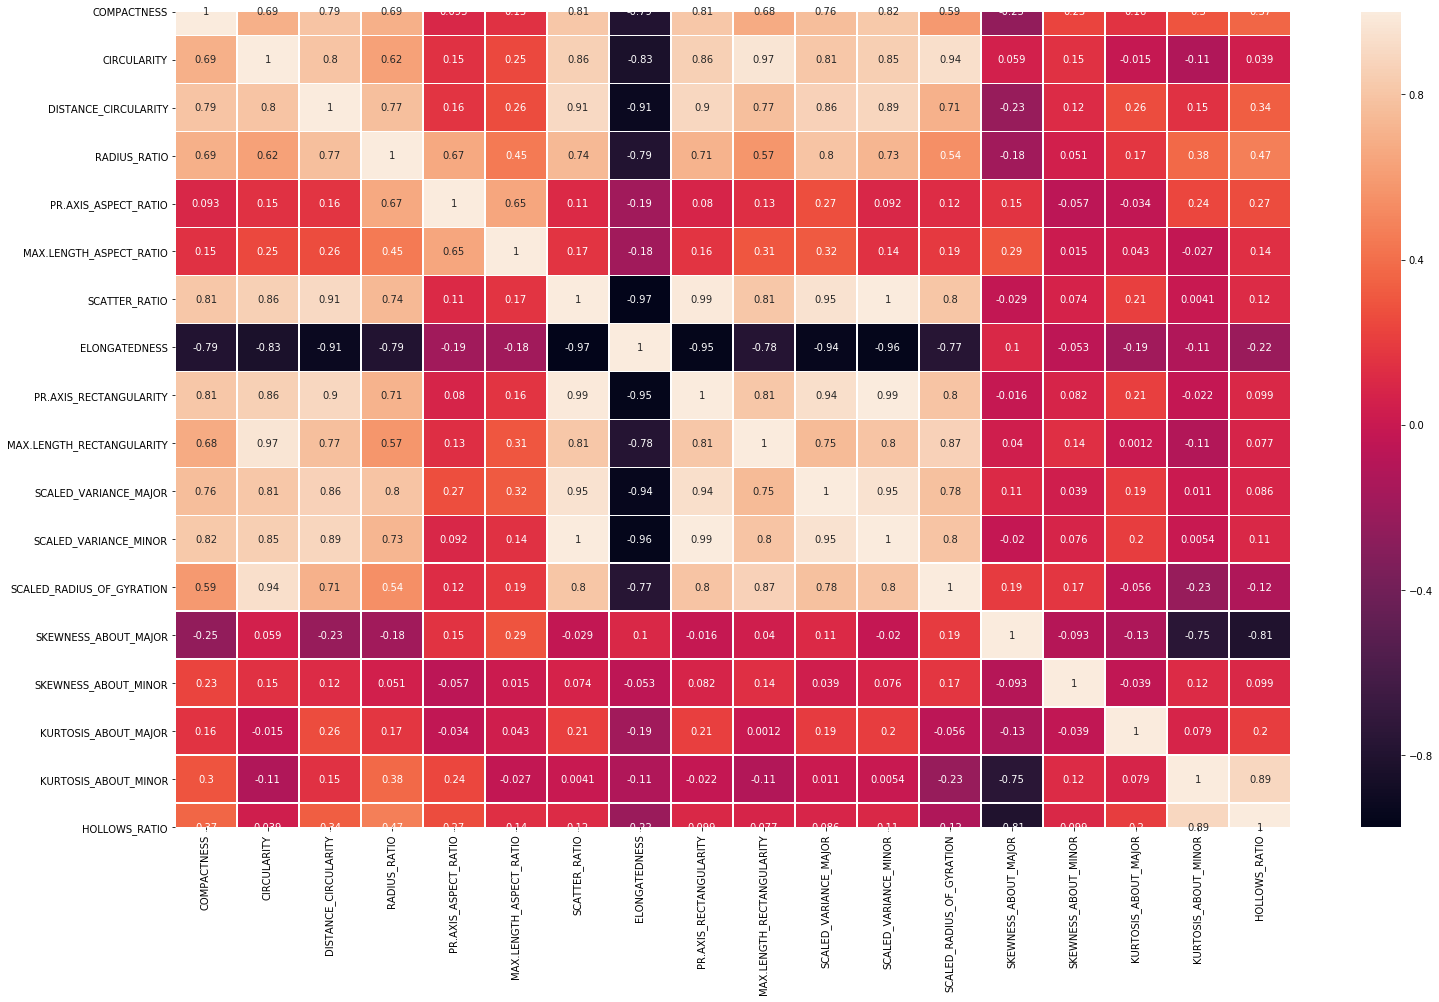

In [9]:
Mvehicle.Correlation_matrix(vehicle)

# Label Encoding

Label Encoding is used to convert the categorical labels to its numeric representation. 

In [10]:
vdataset = Mvehicle.label_encoding(vehicle)
vdataset.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class,Class_code
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van,3
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van,3
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab,2
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van,3
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus,0


# Training Model

Splitting the data into two set in a ratio of 70% for training set and 30% for testing set.

In [12]:
#Splitting data for training and testing
X_train, X_test, y_train, y_test = Mvehicle.splitting_train_test_data(vdataset)

In [13]:
y_train

794    0
317    2
570    2
750    2
374    3
      ..
725    3
607    3
544    0
643    0
414    3
Name: Class_code, Length: 592, dtype: int32

# Training Classifier with Logistic Regression

In [14]:
classifier = Mvehicle.LogisticRegression_train(X_train, y_train) 

# Testing Model and Evaluating Model Performance

In [15]:
y_predict = Mvehicle.test_classifier(classifier , X_test)
#y_predict

In [16]:
accuracy =  metrics.accuracy_score(y_test, y_predict)
print("Accuracy: ",accuracy*100)

Accuracy:  79.92125984251969


## Confusion Matrix

 According to the above confusion matrix, it is observed that overall the model has not perform good as,

- For False Positive case, it can be observed that 18 points that are misclassified by the model belongs to "saab" Class, which   is missclassifies as they originally belong to "opel" Class, similarly 20 data points has been missclassified for belonging       to "opel" class, but originally they belong to "saab" class.                                                              

As a result, we can conclude the model is not sucessfully able to classify points between "opel" and "saab" class. 

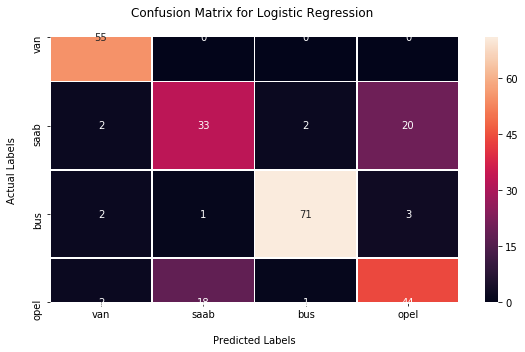

In [17]:
cmatrix = Mvehicle.model_confusion_matrix(y_test , y_predict , vdataset)

# Visualization of Misclassification

The below stacked bar chart represents the misclassified points of Logistic Regression Classifier. Our model is not able to distinguish 
well between the <b> saab </b> and <b> opel </b> class as shown in the graph.

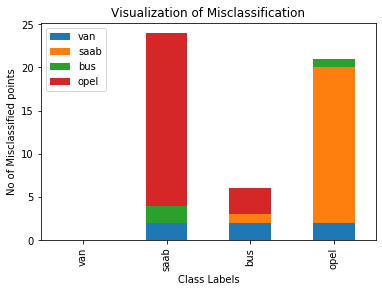

In [18]:
visualize.Misclasssification_visualization(y_test, y_predict,vdataset)

In [19]:

print(classification_report(y_test, y_predict ))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        77
           1       0.66      0.68      0.67        65
           2       0.63      0.58      0.61        57
           3       0.90      1.00      0.95        55

    accuracy                           0.80       254
   macro avg       0.79      0.79      0.79       254
weighted avg       0.80      0.80      0.80       254



# Cross Validation Score 

KFold Cross Validation is used for evaluation of Logistic Regression. For this, I have used 10-Fold cross validation where the dataset will be splitted into 10 folds.

In [20]:
#Cross Validation Score For Logistic Regression Classifier
cv = Mvehicle.cross_validation(vdataset , classifier)
print("Cross Validation Score: ",cv)

Cross Validation Score:  0.7909965397910561


Since Cross Validation Score is less than accuracy which is 80%, we would further try tuning the hyper-parameters of Logistic Regression for better results.

# Model Evaluation 

Model Evaluation is done for determinig the accuracy of differnet classifiers using KFold Cross Validation.
For this Purpose Folloing classifiers are used:
    - Logistic Regression
    - K-Nearest Neighbors
    - Decision Tree
    - Gausian NaiveBayes
    - Support Vector Machine
    - Random Forest

According to the graph shown below, we can compare the range and distribution of the accuracy for each model.
As shown, we can conclude that SVM and Logistic Regression classifiers performance will be better as compare to other classifiers.

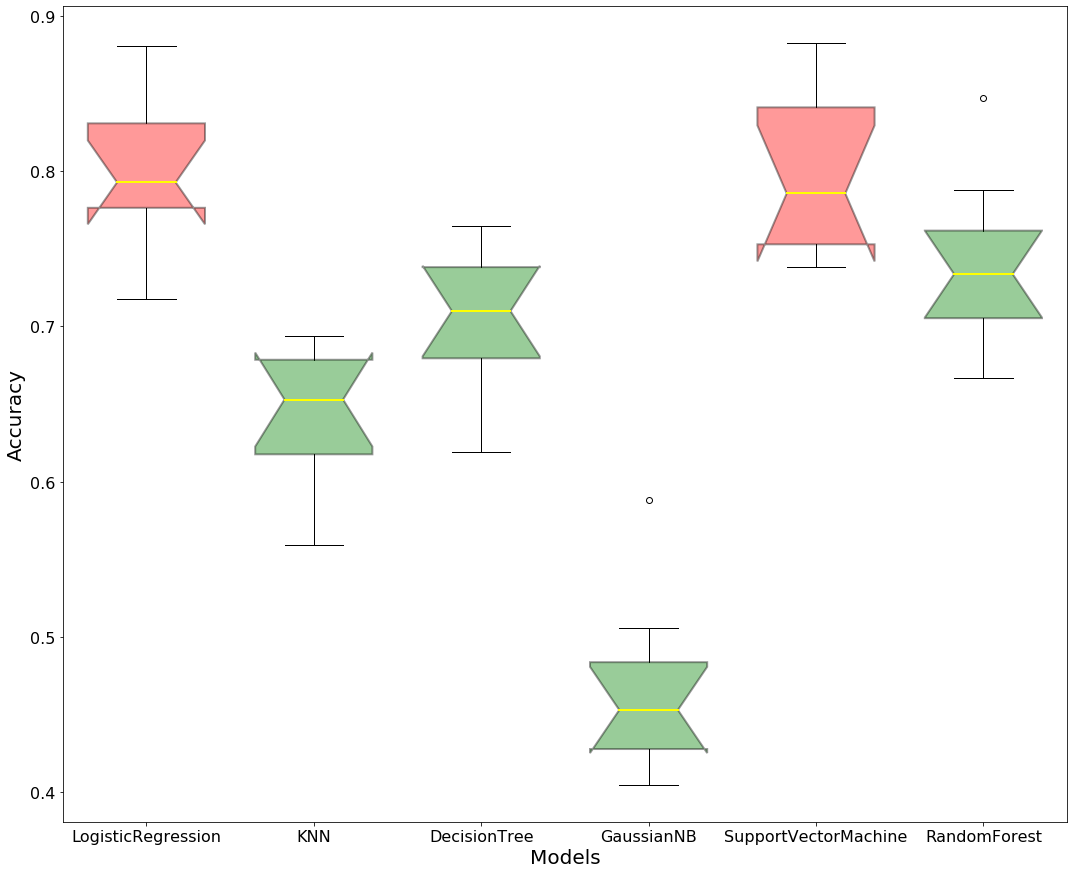

In [21]:
model.Evaluation_model(vdataset)

# Training Model with Support Vectore Machine

Performing Hyper-Parameters tuning of Support Vectore Machine using GridSearch techniuqe

In [22]:
classifier = model.SVM_train(X_train,y_train)

In [23]:
y_predict = Mvehicle.test_classifier(classifier , X_test)

In [24]:
accuracy =  metrics.accuracy_score(y_test, y_predict)
print("Accuracy: ",accuracy*100)

Accuracy:  78.34645669291339


Accuracy with Support Vector Machine is 78% , which is not comparatively good than Logistic Regression that is 80% even after tuning the hyperparameters of Logistic Regression. Further I would be using other comparative techniques to evaluate model, For now I have used Support Vectore Machine classifier which altogether has not been a good model for this dataset.

# Visualization of Misclasssification

The below stacked bar chart represents the misclassified points of Support Vector Machine Classifier. This model is also not able to distinguish well between the <b> saab </b> and <b> opel </b> class and mixing both of them. As it can be observed from the graph that the false positive ratio of <b> saab </b> and <b> opel </b> is maximum as compare to other classes.

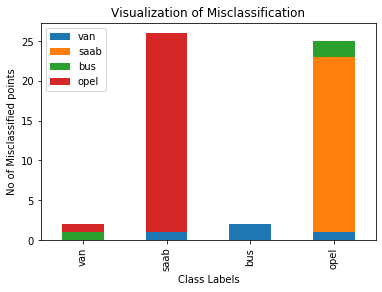

In [25]:
visualize.Misclasssification_visualization(y_test, y_predict,vdataset)

# Conclusion

By comparing the misclassification of both of the classifiers <b> Logistic Regression </b> and
<b> Support Vector Machine </b> we can conclude overall our model is not able to classify between <b> saab </b>
and <b> opel </b> class. We might be missing some details in the dataset. Further I would look in the dataset and
try to find the problem as to why our model is overfitting the data.